In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [6]:
from datetime import date
from nsepy import get_history

In [7]:
st=get_history(symbol='AXISBANK',start=date(2022,1,1),end=date(2023,1,31))

In [8]:
st

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2022-01-03,AXISBANK,EQ,678.55,680.25,698.50,679.00,697.95,696.35,692.07,8550860,5.917817e+14,158369,4541759,0.5311
2022-01-04,AXISBANK,EQ,696.35,701.00,711.05,700.05,709.50,709.15,706.09,9705906,6.853217e+14,209626,4210072,0.4338
2022-01-05,AXISBANK,EQ,709.15,711.90,730.90,707.75,726.00,726.90,721.45,11312955,8.161738e+14,218427,4879629,0.4313
2022-01-06,AXISBANK,EQ,726.90,719.95,733.50,719.00,729.00,730.30,725.93,7955578,5.775164e+14,150026,3908328,0.4913
2022-01-07,AXISBANK,EQ,730.30,734.00,740.90,725.25,730.85,730.60,733.41,10454143,7.667219e+14,234606,5629058,0.5385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-20,AXISBANK,EQ,928.70,931.25,934.85,924.65,929.50,930.55,930.62,4511360,4.198347e+14,123210,2221863,0.4925
2023-01-23,AXISBANK,EQ,930.55,936.00,939.70,924.45,930.00,932.70,932.22,5236124,4.881241e+14,171818,2830172,0.5405
2023-01-24,AXISBANK,EQ,932.70,935.00,935.00,903.75,910.30,910.20,916.33,18527897,1.697762e+15,385048,9565830,0.5163


In [9]:
data=st['Close']

<AxesSubplot:xlabel='Date'>

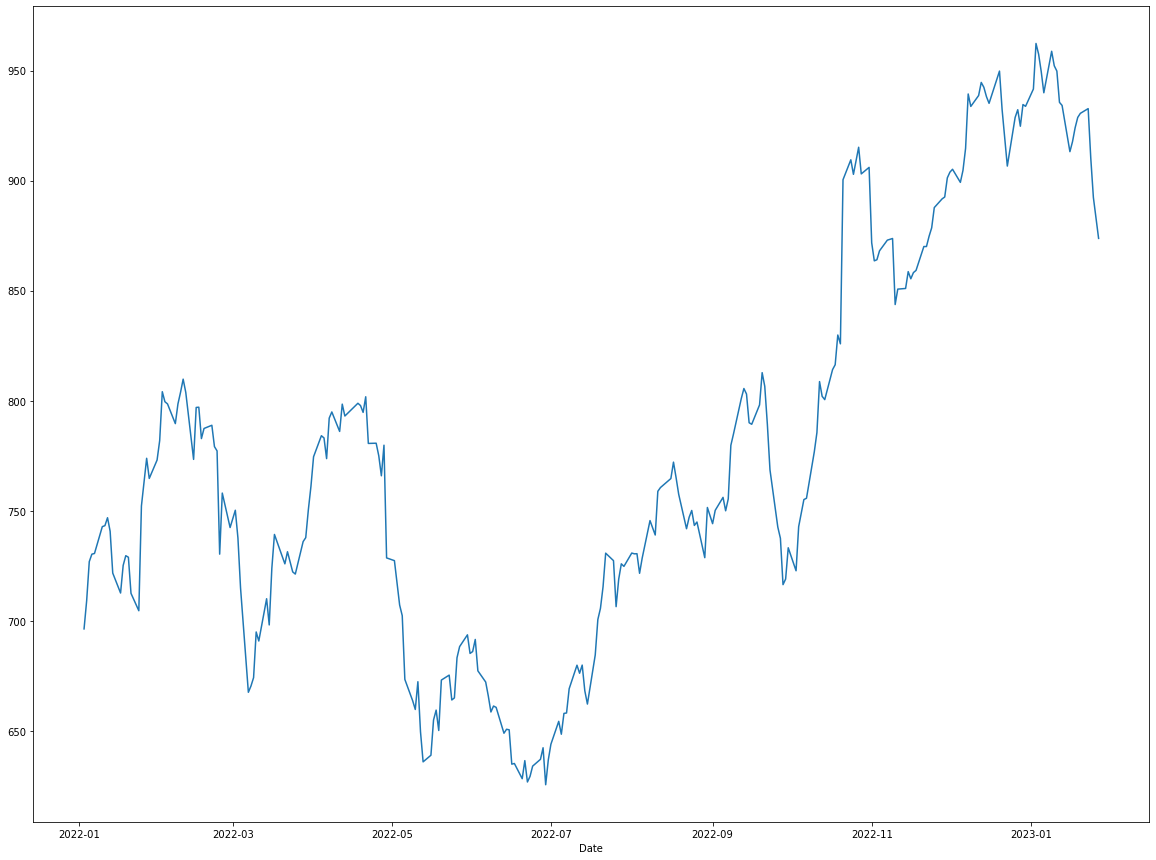

In [10]:
data.plot(figsize=(20,15))

<AxesSubplot:xlabel='Date'>

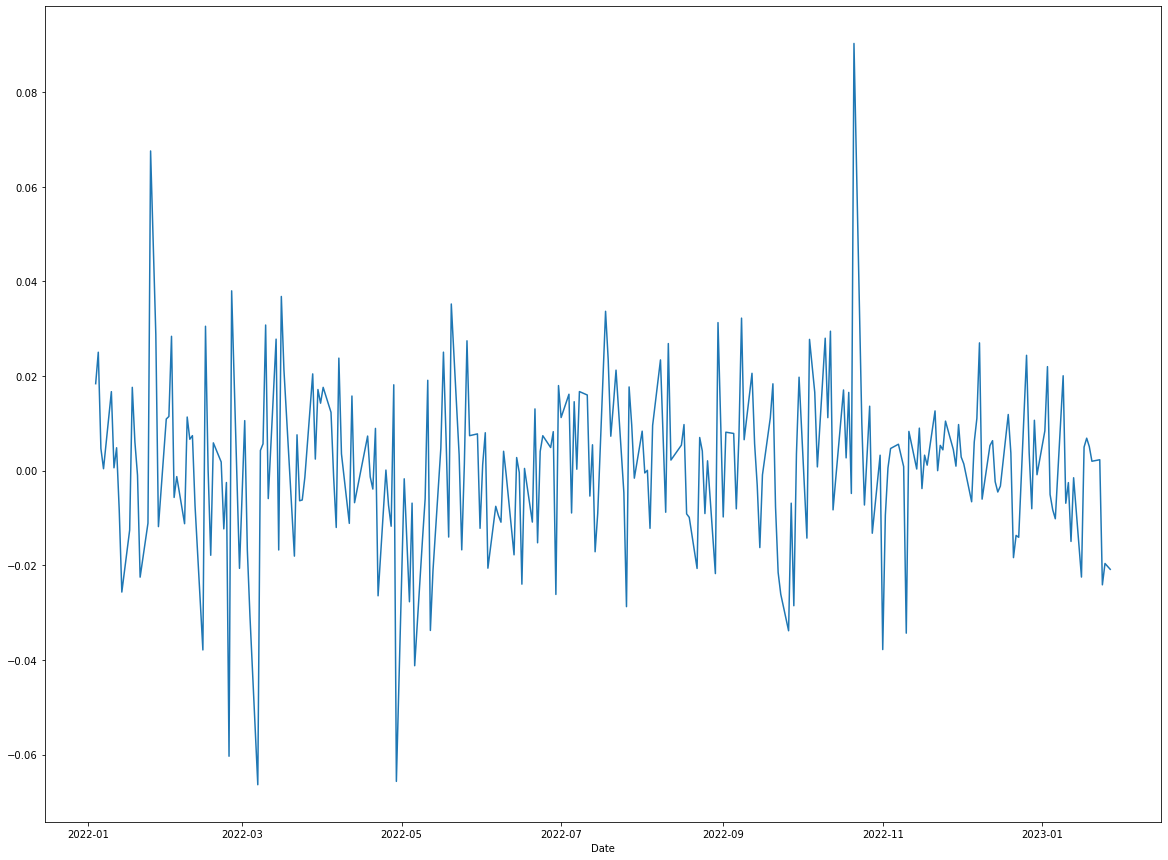

In [14]:
data_pct=data.pct_change()
data_pct.plot(figsize=(20,15))

/Users/devparekh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

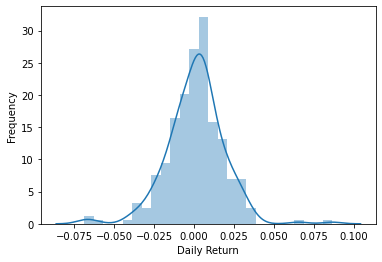

In [16]:
log_returns = np.log(1 + data.pct_change())
#Plot
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [17]:
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var)

In [52]:
stdev = log_returns.std()
days = 10
trials = 10
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift + stdev * Z)

In [53]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = data.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

In [54]:
price_frame=pd.DataFrame(price_paths)

In [55]:
price_frame

,0,1,2,3,4,5,6,7,8,9
0,873.750000,873.750000,873.750000,873.750000,873.750000,873.750000,873.750000,873.750000,873.750000,873.750000
1,888.538821,858.993191,894.235101,887.199766,890.052034,886.781823,861.714369,871.703780,857.969156,865.996041
2,887.884216,861.788403,894.870999,862.665400,892.857141,876.237678,857.629876,874.413220,880.213594,890.382736
3,874.396501,876.751756,887.766488,839.972315,905.360628,872.312399,842.159084,855.178638,880.546930,883.482027
4,885.087775,885.116187,895.565139,830.739191,893.332941,889.231747,868.531030,866.216106,871.457700,879.382992
5,878.953623,896.318462,908.766743,822.014577,900.530128,896.194184,855.635256,864.490364,862.736195,858.664713
6,865.548609,888.630925,922.071407,797.891359,904.190072,869.929815,852.295981,854.034786,869.270433,846.595255
7,868.204950,912.748853,940.859660,771.576790,911.668402,884.893029,829.955744,850.116246,866.505327,851.820800
8,899.249380,910.265814,967.238753,777.692173,919.253537,912.161685,851.750601,841.190202,854.210940,877.095490
9,910.455160,925.728600,946.608902,787.725079,930.007409,911.617265,866.540601,818.157039,871.547079,885.599182


In [56]:
price_frame=price_frame.transpose()

In [57]:
price_frame

,0,1,2,3,4,5,6,7,8,9
0,873.75,888.538821,887.884216,874.396501,885.087775,878.953623,865.548609,868.204950,899.249380,910.455160
1,873.75,858.993191,861.788403,876.751756,885.116187,896.318462,888.630925,912.748853,910.265814,925.728600
2,873.75,894.235101,894.870999,887.766488,895.565139,908.766743,922.071407,940.859660,967.238753,946.608902
3,873.75,887.199766,862.665400,839.972315,830.739191,822.014577,797.891359,771.576790,777.692173,787.725079
4,873.75,890.052034,892.857141,905.360628,893.332941,900.530128,904.190072,911.668402,919.253537,930.007409
5,873.75,886.781823,876.237678,872.312399,889.231747,896.194184,869.929815,884.893029,912.161685,911.617265
6,873.75,861.714369,857.629876,842.159084,868.531030,855.635256,852.295981,829.955744,851.750601,866.540601
7,873.75,871.703780,874.413220,855.178638,866.216106,864.490364,854.034786,850.116246,841.190202,818.157039
8,873.75,857.969156,880.213594,880.546930,871.457700,862.736195,869.270433,866.505327,854.210940,871.547079
9,873.75,865.996041,890.382736,883.482027,879.382992,858.664713,846.595255,851.820800,877.095490,885.599182


<AxesSubplot:>

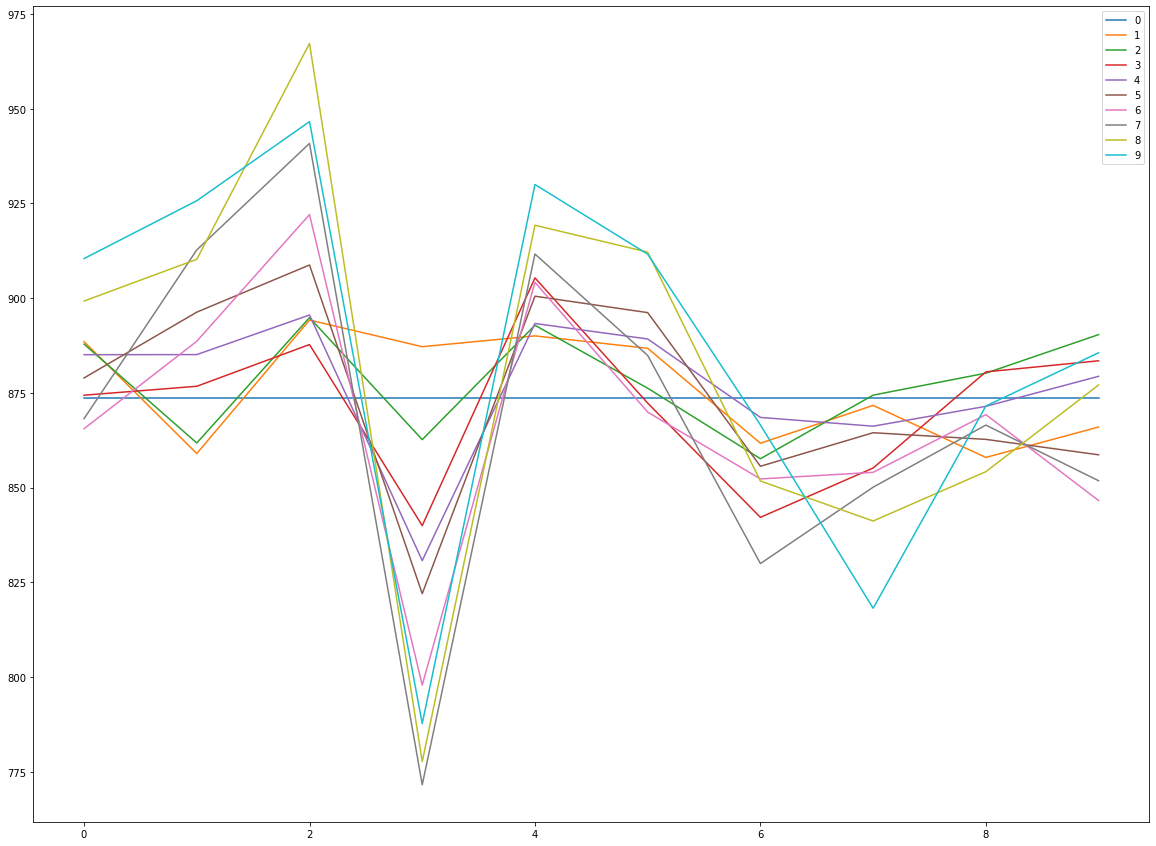

In [58]:
price_frame.plot(figsize=(20,15))